# Exercise 5

### Problem 1:  Predicting CentralAir using SalePrice


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Import data
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---
#### a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

Y    1365
N      95
Name: CentralAir, dtype: int64

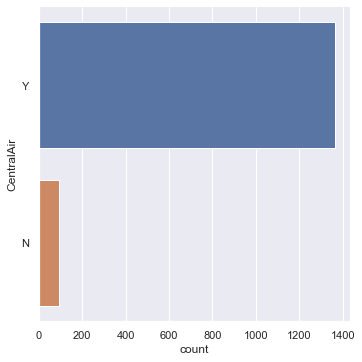

In [33]:
SalePrice = pd.DataFrame(houseData['SalePrice'])      # Predictor
CentralAir = pd.DataFrame(houseData['CentralAir'])    # Response

# Plot the distribution of CentralAir to check the imbalance of Y against N.
sb.catplot(y = "CentralAir", data = CentralAir, kind = "count")

# Print the ratio of the classes Y:N
CentralAir["CentralAir"].value_counts()

---
#### b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

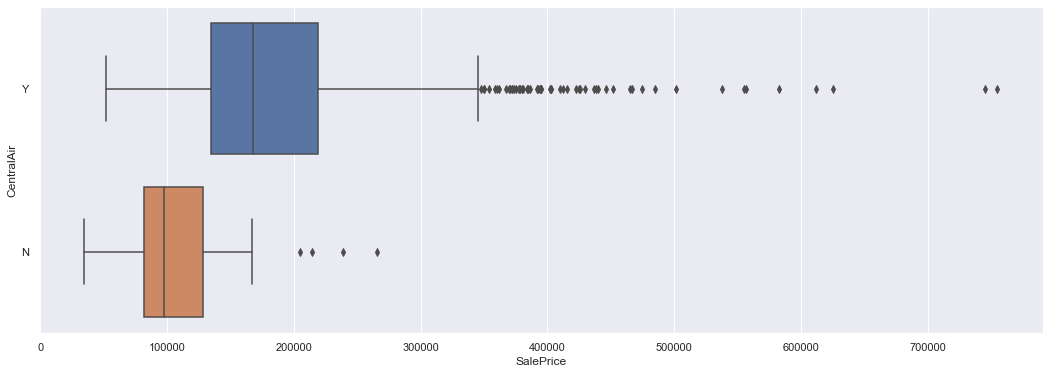

In [34]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([SalePrice, CentralAir], axis = 1).reindex(SalePrice.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = houseData, orient = "h")

---
#### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [35]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

---
#### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [36]:
# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SalePrice, CentralAir, test_size = 360)


---
#### e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.

In [37]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=2)

---
#### f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

[Text(334.8, 543.6, 'SalePrice <= 98150.0\ngini = 0.124\nsamples = 1100\nvalue = [73, 1027]\nclass = Y'),
 Text(167.4, 326.16, 'SalePrice <= 61691.5\ngini = 0.493\nsamples = 82\nvalue = [36, 46]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.467\nsamples = 70\nvalue = [26, 44]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 145125.0\ngini = 0.07\nsamples = 1018\nvalue = [37, 981]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.153\nsamples = 347\nvalue = [29, 318]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.024\nsamples = 671\nvalue = [8, 663]\nclass = Y')]

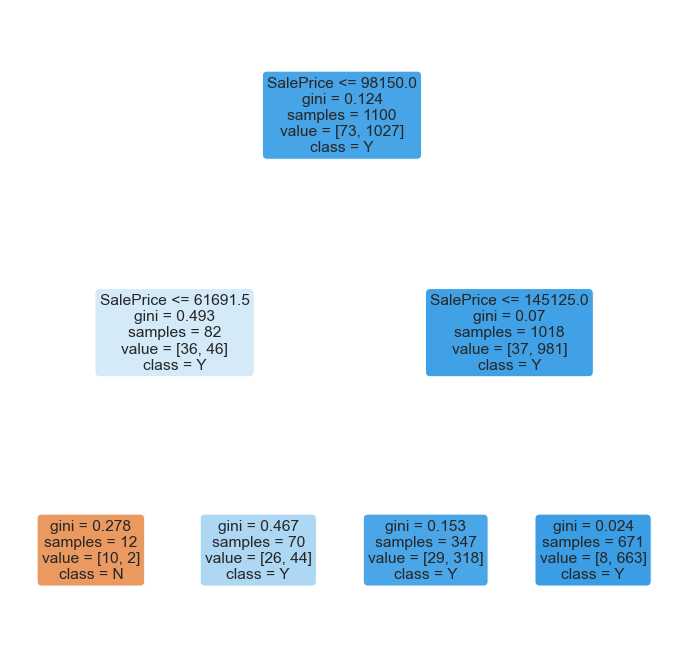

In [38]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

---
#### g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

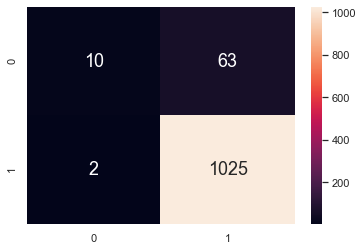

In [39]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)


# Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})


---
#### h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [40]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t\t:", 1025/(1025+2))
print("True Negative Rate \t\t:", 10/(63+10))
print("False Positive Rate \t\t:", 63/(63+10))
print("False Negative Rate \t\t:", 2/(1025+2))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9409090909090909
True Positive Rate 		: 0.9980525803310614
True Negative Rate 		: 0.136986301369863
False Positive Rate 		: 0.863013698630137
False Negative Rate 		: 0.0019474196689386564



---
#### i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

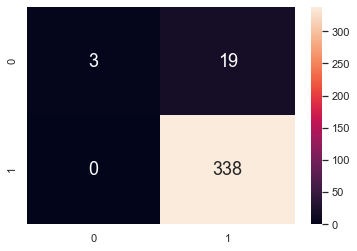

In [41]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

---
#### j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [42]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t\t:", 338/(338+0))
print("True Negative Rate \t\t:", 3/(19+3))
print("False Positive Rate \t\t:", 19/(19+3))
print("False Negative Rate \t\t:", 0/(338+0))
print()

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9472222222222222
True Positive Rate 		: 1.0
True Negative Rate 		: 0.13636363636363635
False Positive Rate 		: 0.8636363636363636
False Negative Rate 		: 0.0



---
### Problem 2 : Predicting CentralAir using Other Variables

Perform all the above steps on “CentralAir” against each of the variables “GrLivArea”, “OverallQual”, “YearBuilt”, oneby-one to perform individual Binary Classifications and obtain individual univariate Decision Tree Models in each case.
Consider all predictor variables “GrLivArea”, “OverallQual”, “YearBuilt” as Numeric in case of this classification problem.

---
### 2.1 “GrLivArea”

---
#### a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

Y    1365
N      95
Name: CentralAir, dtype: int64

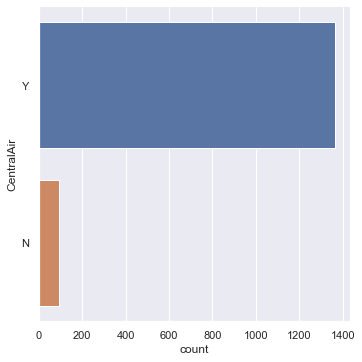

In [43]:
GrLivArea = pd.DataFrame(houseData['GrLivArea'])      # Predictor
CentralAir = pd.DataFrame(houseData['CentralAir'])    # Response

# Plot the distribution of CentralAir to check the imbalance of Y against N.
sb.catplot(y = "CentralAir", data = CentralAir, kind = "count")

# Print the ratio of the classes Y:N
CentralAir["CentralAir"].value_counts()

---
#### b) Plot CentralAir against GrLivArea using any appropriate bivariate plot to note the mutual relationship

<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

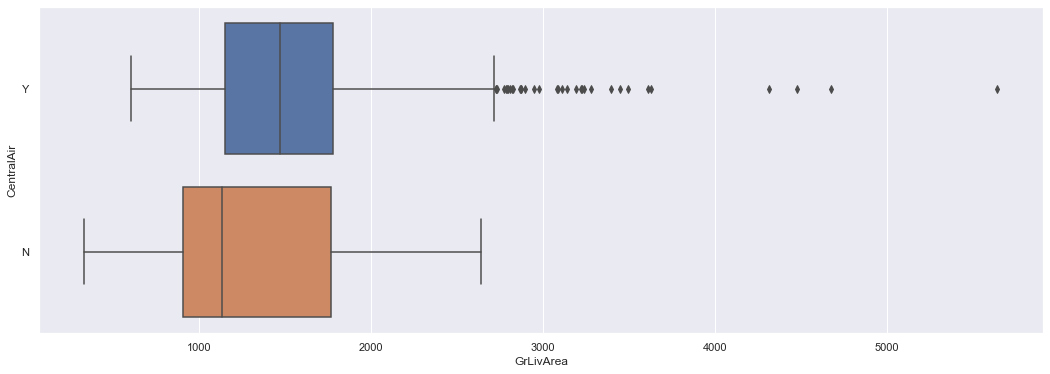

In [44]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([GrLivArea, CentralAir], axis = 1).reindex(GrLivArea.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "GrLivArea", y = "CentralAir", data = houseData, orient = "h")

---
#### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [45]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

---
#### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [46]:
# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(GrLivArea, CentralAir, test_size = 360)


---
#### e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using GrLivArea.

In [47]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=2)

---
#### f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

[Text(267.84000000000003, 543.6, 'GrLivArea <= 568.0\ngini = 0.13\nsamples = 1100\nvalue = [77, 1023]\nclass = Y'),
 Text(133.92000000000002, 326.16, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(401.76000000000005, 326.16, 'GrLivArea <= 1045.5\ngini = 0.124\nsamples = 1096\nvalue = [73, 1023]\nclass = Y'),
 Text(267.84000000000003, 108.72000000000003, 'gini = 0.263\nsamples = 193\nvalue = [30, 163]\nclass = Y'),
 Text(535.6800000000001, 108.72000000000003, 'gini = 0.091\nsamples = 903\nvalue = [43, 860]\nclass = Y')]

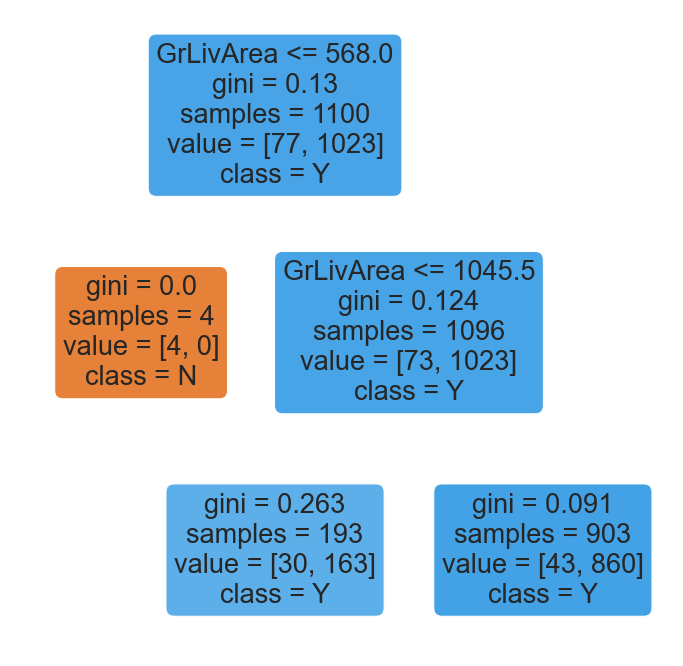

In [48]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["GrLivArea"], 
          class_names=["N","Y"])

---
#### g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

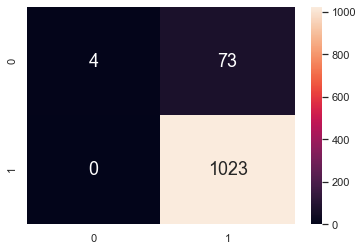

In [49]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)


# Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})


---
#### h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [50]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t\t:", 1023/(1023+0))
print("True Negative Rate \t\t:", 4/(73+4))
print("False Positive Rate \t\t:", 73/(73+4))
print("False Negative Rate \t\t:", 0/(1023+0))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9336363636363636
True Positive Rate 		: 1.0
True Negative Rate 		: 0.05194805194805195
False Positive Rate 		: 0.948051948051948
False Negative Rate 		: 0.0



---
#### i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

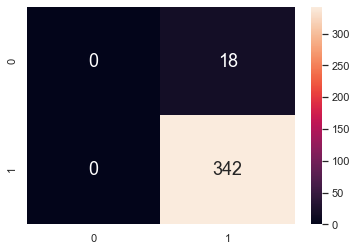

In [51]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

---
#### j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [52]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t\t:", 342/(342+0))
print("True Negative Rate \t\t:", 0/(18+0))
print("False Positive Rate \t\t:", 18/(18+0))
print("False Negative Rate \t\t:", 0/(342+0))
print()

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.95
True Positive Rate 		: 1.0
True Negative Rate 		: 0.0
False Positive Rate 		: 1.0
False Negative Rate 		: 0.0



---
### 2.2 ““OverallQual”

---
#### a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

Y    1365
N      95
Name: CentralAir, dtype: int64

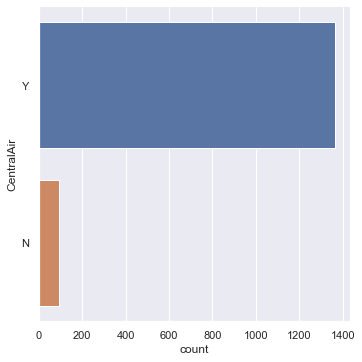

In [54]:
OverallQual = pd.DataFrame(houseData['OverallQual'])      # Predictor
CentralAir = pd.DataFrame(houseData['CentralAir'])    # Response

# Plot the distribution of CentralAir to check the imbalance of Y against N.
sb.catplot(y = "CentralAir", data = CentralAir, kind = "count")

# Print the ratio of the classes Y:N
CentralAir["CentralAir"].value_counts()

---
#### b) Plot CentralAir against OverallQual using any appropriate bivariate plot to note the mutual relationship

<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

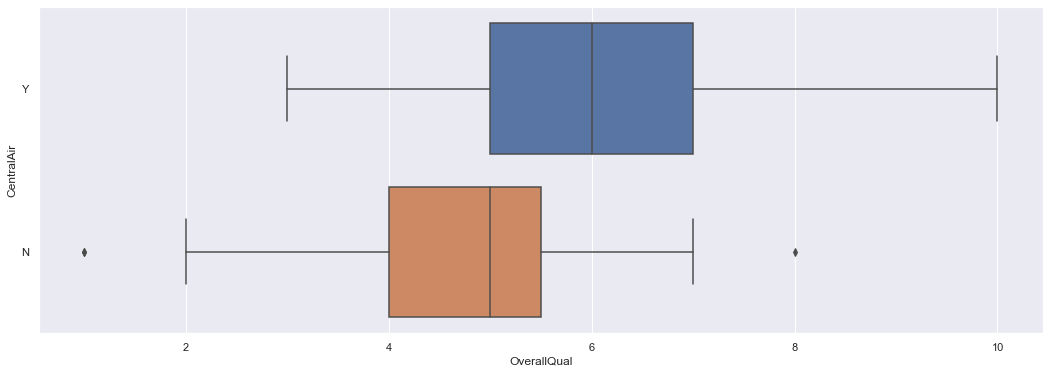

In [55]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([OverallQual, CentralAir], axis = 1).reindex(OverallQual.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "OverallQual", y = "CentralAir", data = houseData, orient = "h")

---
#### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [56]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

---
#### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [57]:
# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(OverallQual, CentralAir, test_size = 360)


---
#### e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using GrLivArea.

In [58]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=2)

---
#### f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

[Text(334.8, 543.6, 'OverallQual <= 3.5\ngini = 0.129\nsamples = 1100\nvalue = [76, 1024]\nclass = Y'),
 Text(167.4, 326.16, 'OverallQual <= 2.5\ngini = 0.432\nsamples = 19\nvalue = [13, 6]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.469\nsamples = 16\nvalue = [10, 6]\nclass = N'),
 Text(502.20000000000005, 326.16, 'OverallQual <= 5.5\ngini = 0.11\nsamples = 1081\nvalue = [63, 1018]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.212\nsamples = 381\nvalue = [46, 335]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.047\nsamples = 700\nvalue = [17, 683]\nclass = Y')]

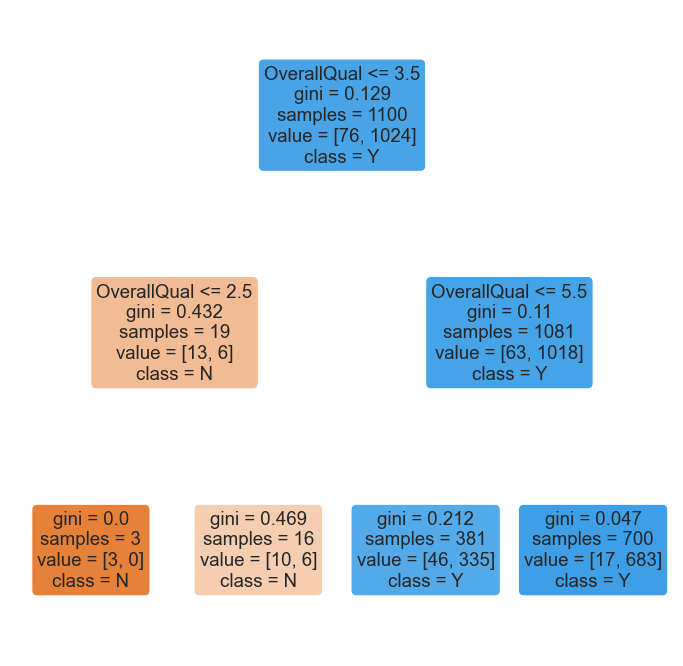

In [59]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["N","Y"])

---
#### g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

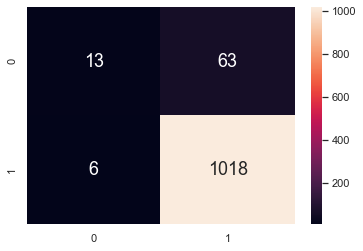

In [60]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)


# Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})


---
#### h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [61]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t\t:", 1018/(1018+6))
print("True Negative Rate \t\t:", 13/(63+13))
print("False Positive Rate \t\t:", 63/(63+13))
print("False Negative Rate \t\t:", 6/(1018+6))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9372727272727273
True Positive Rate 		: 0.994140625
True Negative Rate 		: 0.17105263157894737
False Positive Rate 		: 0.8289473684210527
False Negative Rate 		: 0.005859375



---
#### i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

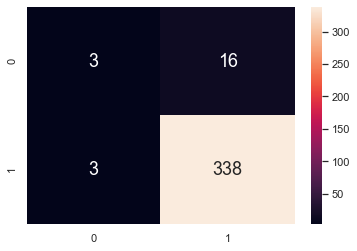

In [62]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

---
#### j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [63]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t\t:", 338/(338+3))
print("True Negative Rate \t\t:", 3/(16+3))
print("False Positive Rate \t\t:", 16/(16+3))
print("False Negative Rate \t\t:", 3/(338+3))
print()

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9472222222222222
True Positive Rate 		: 0.9912023460410557
True Negative Rate 		: 0.15789473684210525
False Positive Rate 		: 0.8421052631578947
False Negative Rate 		: 0.008797653958944282



---
### 2.3 “YearBuilt”

---
#### a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

Y    1365
N      95
Name: CentralAir, dtype: int64

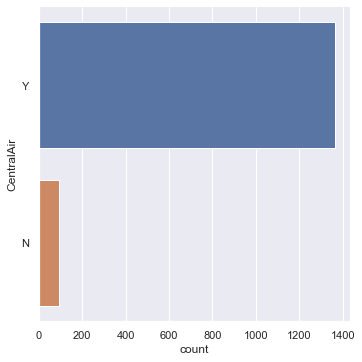

In [64]:
YearBuilt = pd.DataFrame(houseData['YearBuilt'])      # Predictor
CentralAir = pd.DataFrame(houseData['CentralAir'])    # Response

# Plot the distribution of CentralAir to check the imbalance of Y against N.
sb.catplot(y = "CentralAir", data = CentralAir, kind = "count")

# Print the ratio of the classes Y:N
CentralAir["CentralAir"].value_counts()

---
#### b) Plot CentralAir against YearBuilt using any appropriate bivariate plot to note the mutual relationship

<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

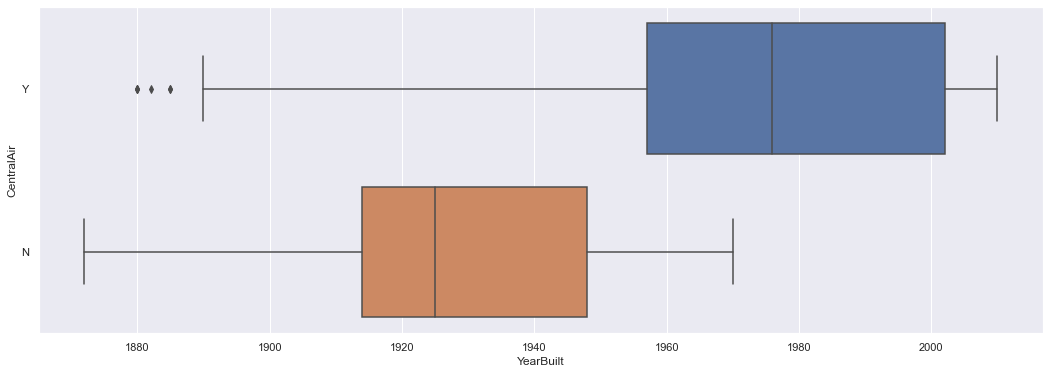

In [65]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([YearBuilt, CentralAir], axis = 1).reindex(YearBuilt.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "YearBuilt", y = "CentralAir", data = houseData, orient = "h")

---
#### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [69]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

---
#### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [70]:
# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(YearBuilt, CentralAir, test_size = 360)


---
#### e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using GrLivArea.

In [71]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=2)

---
#### f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

[Text(334.8, 543.6, 'YearBuilt <= 1951.5\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = Y'),
 Text(167.4, 326.16, 'YearBuilt <= 1917.5\ngini = 0.37\nsamples = 253\nvalue = [62, 191]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.486\nsamples = 60\nvalue = [25, 35]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.31\nsamples = 193\nvalue = [37, 156]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'YearBuilt <= 1955.5\ngini = 0.023\nsamples = 847\nvalue = [10, 837]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.184\nsamples = 39\nvalue = [4, 35]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.015\nsamples = 808\nvalue = [6, 802]\nclass = Y')]

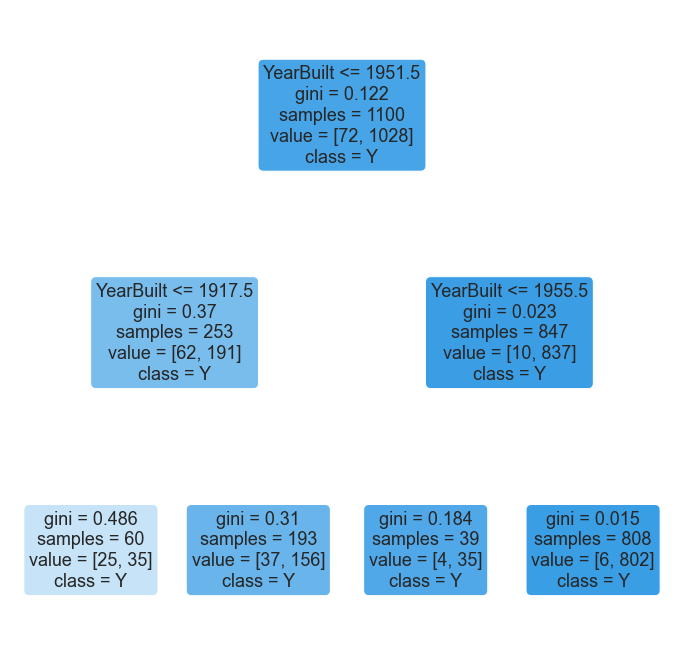

In [72]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["N","Y"])

---
#### g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

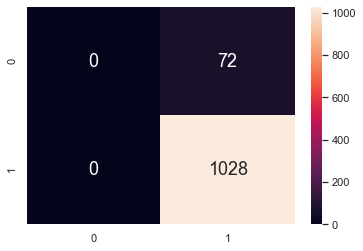

In [73]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)


# Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})


---
#### h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [74]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t\t:", 1028/(1028+0))
print("True Negative Rate \t\t:", 0/(72+0))
print("False Positive Rate \t\t:", 72/(72+0))
print("False Negative Rate \t\t:", 0/(1028+0))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9345454545454546
True Positive Rate 		: 1.0
True Negative Rate 		: 0.0
False Positive Rate 		: 1.0
False Negative Rate 		: 0.0



---
#### i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

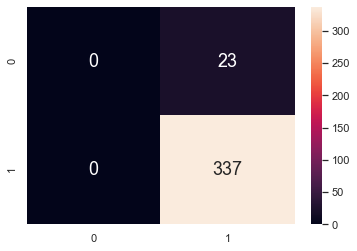

In [75]:
y_test_pred = dectree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

---
#### j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [76]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t\t:", 337/(337+0))
print("True Negative Rate \t\t:", 0/(23+0))
print("False Positive Rate \t\t:", 23/(23+0))
print("False Negative Rate \t\t:", 0/(337+0))
print()

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9361111111111111
True Positive Rate 		: 1.0
True Negative Rate 		: 0.0
False Positive Rate 		: 1.0
False Negative Rate 		: 0.0



---
### Problem 3 : Best Uni-Variate Model to Predict CentralAir

#### 1."SalePrice"
######  Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9409090909090909

True Positive Rate 		    : 0.9980525803310614

False Positive Rate 		: 0.863013698630137

###### Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9472222222222222

True Positive Rate 	        : 1.0

False Positive Rate 		: 0.8636363636363636


#### 2.“GrLivArea”
######  Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9336363636363636

True Positive Rate 		: 1.0

False Positive Rate 		: 0.948051948051948
    
###### Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.95

True Positive Rate 		: 1.0

False Positive Rate 		: 1.0

#### 3.“OverallQual”
######  Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9372727272727273

True Positive Rate 		: 0.994140625

False Positive Rate 		: 0.8289473684210527
    
###### Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9472222222222222

True Positive Rate 		: 0.9912023460410557

False Positive Rate 		: 0.8421052631578947

#### 4.“YearBuilt”
######  Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9345454545454546

True Positive Rate 		: 1.0

False Positive Rate 		: 1.0
    
###### Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9361111111111111

True Positive Rate 		: 1.0

False Positive Rate 		: 1.0

#### Comparison (in terms of numbers):
1)Train Dataset

Classification Accuracy: SalePrice > OverallQual > YearBuilt > GrLivArea

True Positive Rate: GrLivArea = YearBuilt > SalePrice > OverallQual

False Positive Rate: YearBuilt > GrLivArea > SalePrice > OverallQual

2)Test Dataset

Classification Accuracy: GrLivArea > OverallQual = SalePrice > YearBuilt

True Positive Rate: SalePrice = GrLivArea = YearBuilt > OverallQual

False Positive Rate: GrLivArea = YearBuilt > SalePrice > OverallQual


#### Conclusion:

Because, 
the higher the Classification Accuracy, 
the higher the True Positive Rate,
the lower the False Positive Rate,
the better the model.



#### I want to minimise the false positive rate, so OverallQual is the best to predict "CentralAir". It has the lowest False postitive rate, and the classfication accuracy is in the middle which is not bad.